<a href="https://colab.research.google.com/github/saranyapalani/sample/blob/master/hi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('/content/drive/My Drive/final.csv',error_bad_lines=False)
data.head()


,ID,Case Number,Date,Primary Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,11034701,JA366925,01-01-2001 11:00,DECEPTIVE PRACTICE,RESIDENCE,False,4.0,8.0,45.0,NaN,NaN,2001,NaN,NaN
1,11227287,JB147188,10-08-2017 03:00,CRIM SEXUAL ASSAULT,RESIDENCE,False,22.0,21.0,73.0,NaN,NaN,2017,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,BURGLARY,OTHER,False,8.0,18.0,70.0,NaN,NaN,2017,NaN,NaN
3,11227293,JB147230,09-09-2017 20:17,JEWEL THEFT MURDER,RESIDENCE,False,3.0,20.0,42.0,NaN,NaN,2017,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,CRIM SEXUAL ASSAULT,HOTEL/MOTEL,False,1.0,42.0,32.0,NaN,NaN,2017,NaN,NaN


In [0]:
data.drop(['Case Number','X Coordinate', 'Y Coordinate','Year','Ward','Community Area', 
                 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [7]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y %H:%M:%S')
data.head()

,ID,Date,Primary Type,Location Description,Arrest
0,11034701,2001-01-01 11:00:00,DECEPTIVE PRACTICE,RESIDENCE,False
1,11227287,2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,RESIDENCE,False
2,11227583,2017-03-28 14:00:00,BURGLARY,OTHER,False
3,11227293,2017-09-09 20:17:00,JEWEL THEFT MURDER,RESIDENCE,False
4,11227634,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,HOTEL/MOTEL,False


In [8]:
data.shape

(1048575, 5)

In [9]:
data.index = pd.DatetimeIndex(data.Date)
data.head()

,ID,Date,Primary Type,Location Description,Arrest
Date,,,,,
2001-01-01 11:00:00,11034701,2001-01-01 11:00:00,DECEPTIVE PRACTICE,RESIDENCE,False
2017-10-08 03:00:00,11227287,2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,RESIDENCE,False
2017-03-28 14:00:00,11227583,2017-03-28 14:00:00,BURGLARY,OTHER,False
2017-09-09 20:17:00,11227293,2017-09-09 20:17:00,JEWEL THEFT MURDER,RESIDENCE,False
2017-08-26 10:00:00,11227634,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,HOTEL/MOTEL,False


In [10]:
data['Primary Type'].value_counts()

JEWEL THEFT MURDER                   246569
BATTERY                              191915
CRIMINAL DAMAGE                      111376
DECEPTIVE PRACTICE                    76431
ASSAULT                               73642
OTHER OFFENSE                         65728
NARCOTICS                             63375
BURGLARY                              48492
MOTOR VEHICLE JEWEL THEFT MURDER      41755
ROBBERY                               41230
CRIMINAL TRESPASS                     25019
WEAPONS VIOLATION                     17055
OFFENSE INVOLVING CHILDREN            11047
CRIM SEXUAL ASSAULT                    6975
PUBLIC PEACE VIOLATION                 6489
SEX OFFENSE                            5291
INTERFERENCE WITH PUBLIC OFFICER       4468
PROSTITUTION                           3720
ARSON                                  1821
LIQUOR LAW VIOLATION                   1000
GAMBLING                                936
HOMICIDE                                763
KIDNAPPING                      

In [0]:
Groups = data.groupby(data['Primary Type'])
Groups = dict(list(Groups))
theft_data = [Groups['JEWEL THEFT MURDER']]
theft_data = pd.concat(theft_data, axis = 0)
del Groups
del data

In [12]:
theft_prophet = theft_data.resample('M').size().reset_index()
theft_prophet.columns = ['Date', 'Crime Count']
theft_prophet.head()

,Date,Crime Count
0,2001-01-31,81
1,2001-02-28,57
2,2001-03-31,75
3,2001-04-30,89
4,2001-05-31,75


In [13]:
theft_prophet.tail()

,Date,Crime Count
227,2019-12-31,5437
228,2020-01-31,4560
229,2020-02-29,4125
230,2020-03-31,3427
231,2020-04-30,894


In [14]:
theft_prophet_df = pd.DataFrame(theft_prophet)
theft_prophet_df.columns


Index(['Date', 'Crime Count'], dtype='object')

In [15]:
theft_prophet_data = theft_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
theft_prophet_data.head()

,ds,y
0,2001-01-31,81
1,2001-02-28,57
2,2001-03-31,75
3,2001-04-30,89
4,2001-05-31,75


In [0]:
from fbprophet import Prophet
m = Prophet()


In [17]:
m.add_seasonality(name="weekly",period=7,fourier_order=5)

In [18]:
m.fit(theft_prophet_data)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = m.make_future_dataframe(periods=730)
future


,ds
0,2001-01-31
1,2001-02-28
2,2001-03-31
3,2001-04-30
4,2001-05-31
...,...
957,2022-04-26
958,2022-04-27
959,2022-04-28
960,2022-04-29


In [20]:
forecast = m.predict(future)
forecast[['ds','trend','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,trend,yhat,yhat_lower,yhat_upper
957,2022-04-26,4048.011738,3902.701168,1809.058964,5692.642258
958,2022-04-27,4048.825976,3769.609380,1850.299943,5749.172787
959,2022-04-28,4049.640214,3826.805000,1893.029592,5791.789166
960,2022-04-29,4050.454453,3661.957899,1601.961188,5610.971274
961,2022-04-30,4051.268691,3733.730377,1808.716070,5747.038238


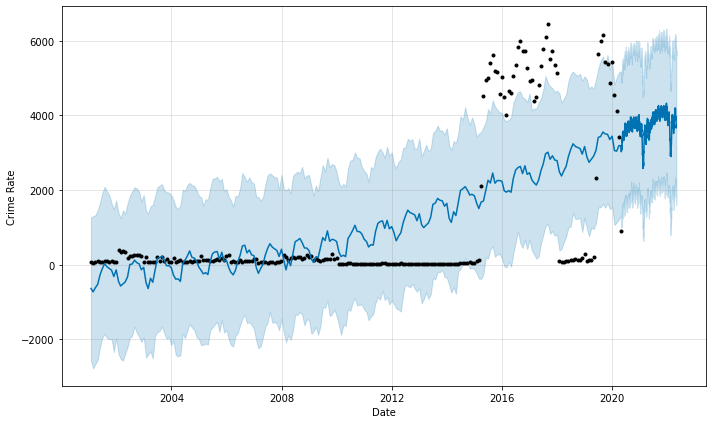

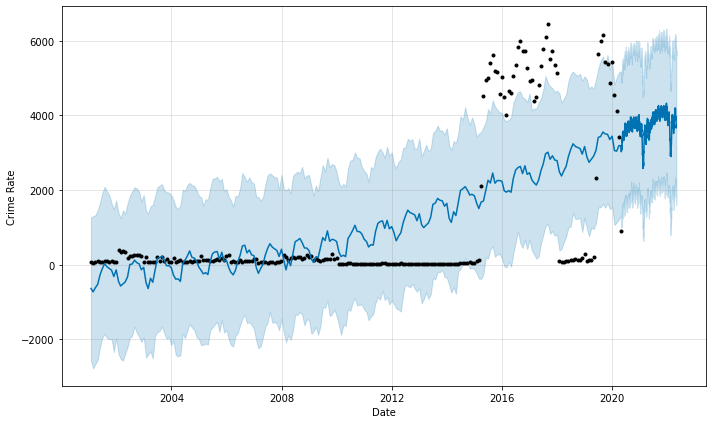

In [21]:
m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

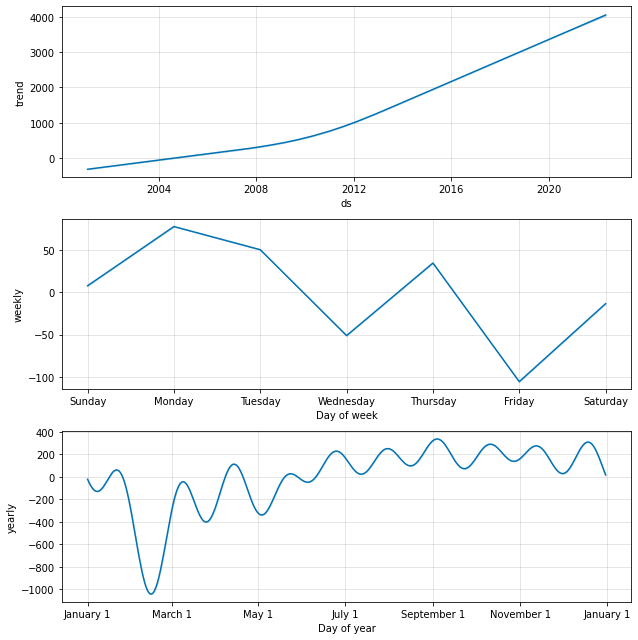

In [22]:
fig=m.plot_components(forecast)

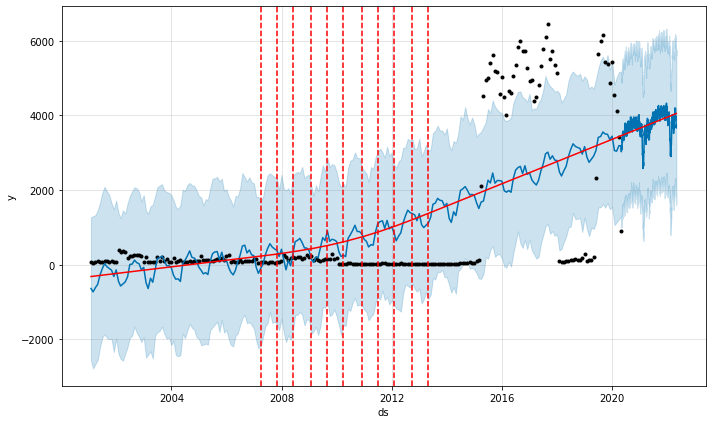

In [23]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
c = add_changepoints_to_plot(fig.gca(),m,forecast)

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
metric_df = forecast.set_index('ds')[['yhat']].join(theft_prophet_data.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
metric_df.head()


,ds,yhat,y
0,2001-01-31,-635.252564,81.0
1,2001-02-28,-727.349201,57.0
2,2001-03-31,-613.396819,75.0
3,2001-04-30,-525.139930,89.0
4,2001-05-31,-273.965616,75.0


In [25]:
r2_score(metric_df.y, metric_df.yhat)

0.41647051890044817

In [26]:
mean_squared_error(metric_df.y, metric_df.yhat)

2302991.806609091

In [27]:
mean_absolute_error(metric_df.y, metric_df.yhat)

1122.841060138876

In [28]:
from fbprophet.diagnostics import cross_validation
forecast = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
forecast.head()


INFO:fbprophet:Making 33 forecasts with cutoffs between 2003-07-24 00:00:00 and 2019-05-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2003-07-31,745.691139,676.489152,815.176822,113,2003-07-24
1,2003-08-31,694.298533,616.664020,766.433437,195,2003-07-24
2,2003-09-30,100.106141,26.191074,181.465826,112,2003-07-24
3,2003-10-31,-160.290759,-231.465736,-88.934137,157,2003-07-24
4,2003-11-30,819.013853,745.956285,891.212281,61,2003-07-24


In [29]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(forecast)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,1.892672e+06,1375.744235,595.805444,2.599210,0.624449,0.692308
1,39 days,2.476317e+06,1573.631705,716.056315,2.607234,0.624449,0.692308
2,40 days,2.477549e+06,1574.023106,721.117076,2.672530,0.624449,0.666667
3,43 days,2.772428e+06,1665.060960,800.754028,2.795497,0.657727,0.649573
4,44 days,2.769285e+06,1664.116785,798.651710,2.866676,0.681428,0.641026
